In [35]:
#Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#plotly has been used for visualization
import plotly as py
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px


import warnings
warnings.filterwarnings("ignore")

In [34]:
data= pd.read_csv(r'/content/customer_behavior_analytcis.csv')
df=pd.DataFrame(data)
df

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,customer_id
0,7.0,129.34,52.17,18.0,0.0,CM00000
1,22.0,24.18,9.19,15.0,7.0,CM00001
2,2.0,32.18,90.69,50.0,2.0,CM00002
3,25.0,26.85,11.22,16.0,10.0,CM00003
4,7.0,125.45,34.19,30.0,3.0,CM00004
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,CM00994
995,5.0,68.36,75.41,43.0,1.0,CM00995
996,18.0,19.53,28.77,18.0,8.0,CM00996
997,4.0,28.97,72.27,57.0,3.0,CM00997


In [36]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,979.000000,979.000000,999.000000,979.000000,999.000000
mean,11.570991,75.457978,49.348759,28.237998,4.313313
std,7.016327,55.067835,32.730973,16.296384,4.532772
min,0.000000,10.260000,5.120000,4.000000,0.000000
25%,6.000000,33.130000,22.375000,16.000000,1.000000
50%,10.000000,49.380000,40.360000,21.000000,2.000000
75%,17.000000,121.255000,77.170000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,21.000000


In [37]:
df_overview = []
columns = df . columns . drop("customer_id")
for i in columns :
    types = df[i] . dtypes
    unique_data = df[i] . nunique()

    missing_count=df[i].isnull().sum()
    value_count= df[i].isnull().count()
    missing_percentage= round(missing_count/value_count*100,2)

    duplicated= df.duplicated().sum()
    df_overview . append ([i , types , unique_data , missing_count, missing_percentage,duplicated])

df_info = pd . DataFrame (df_overview)
df_info . columns =['name of column' , 'types' ,'unique_data' , 'missing value', "missing percentage","duplicated"]

df_info.style.highlight_max(color = 'aqua', axis = 0)

,name of column,types,unique_data,missing value,missing percentage,duplicated
0,total_purchases,float64,32,20,2.000000,0
1,avg_cart_value,float64,943,20,2.000000,0
2,total_time_spent,float64,953,0,0.000000,0
3,product_click,float64,64,20,2.000000,0
4,discount_counts,float64,21,0,0.000000,0


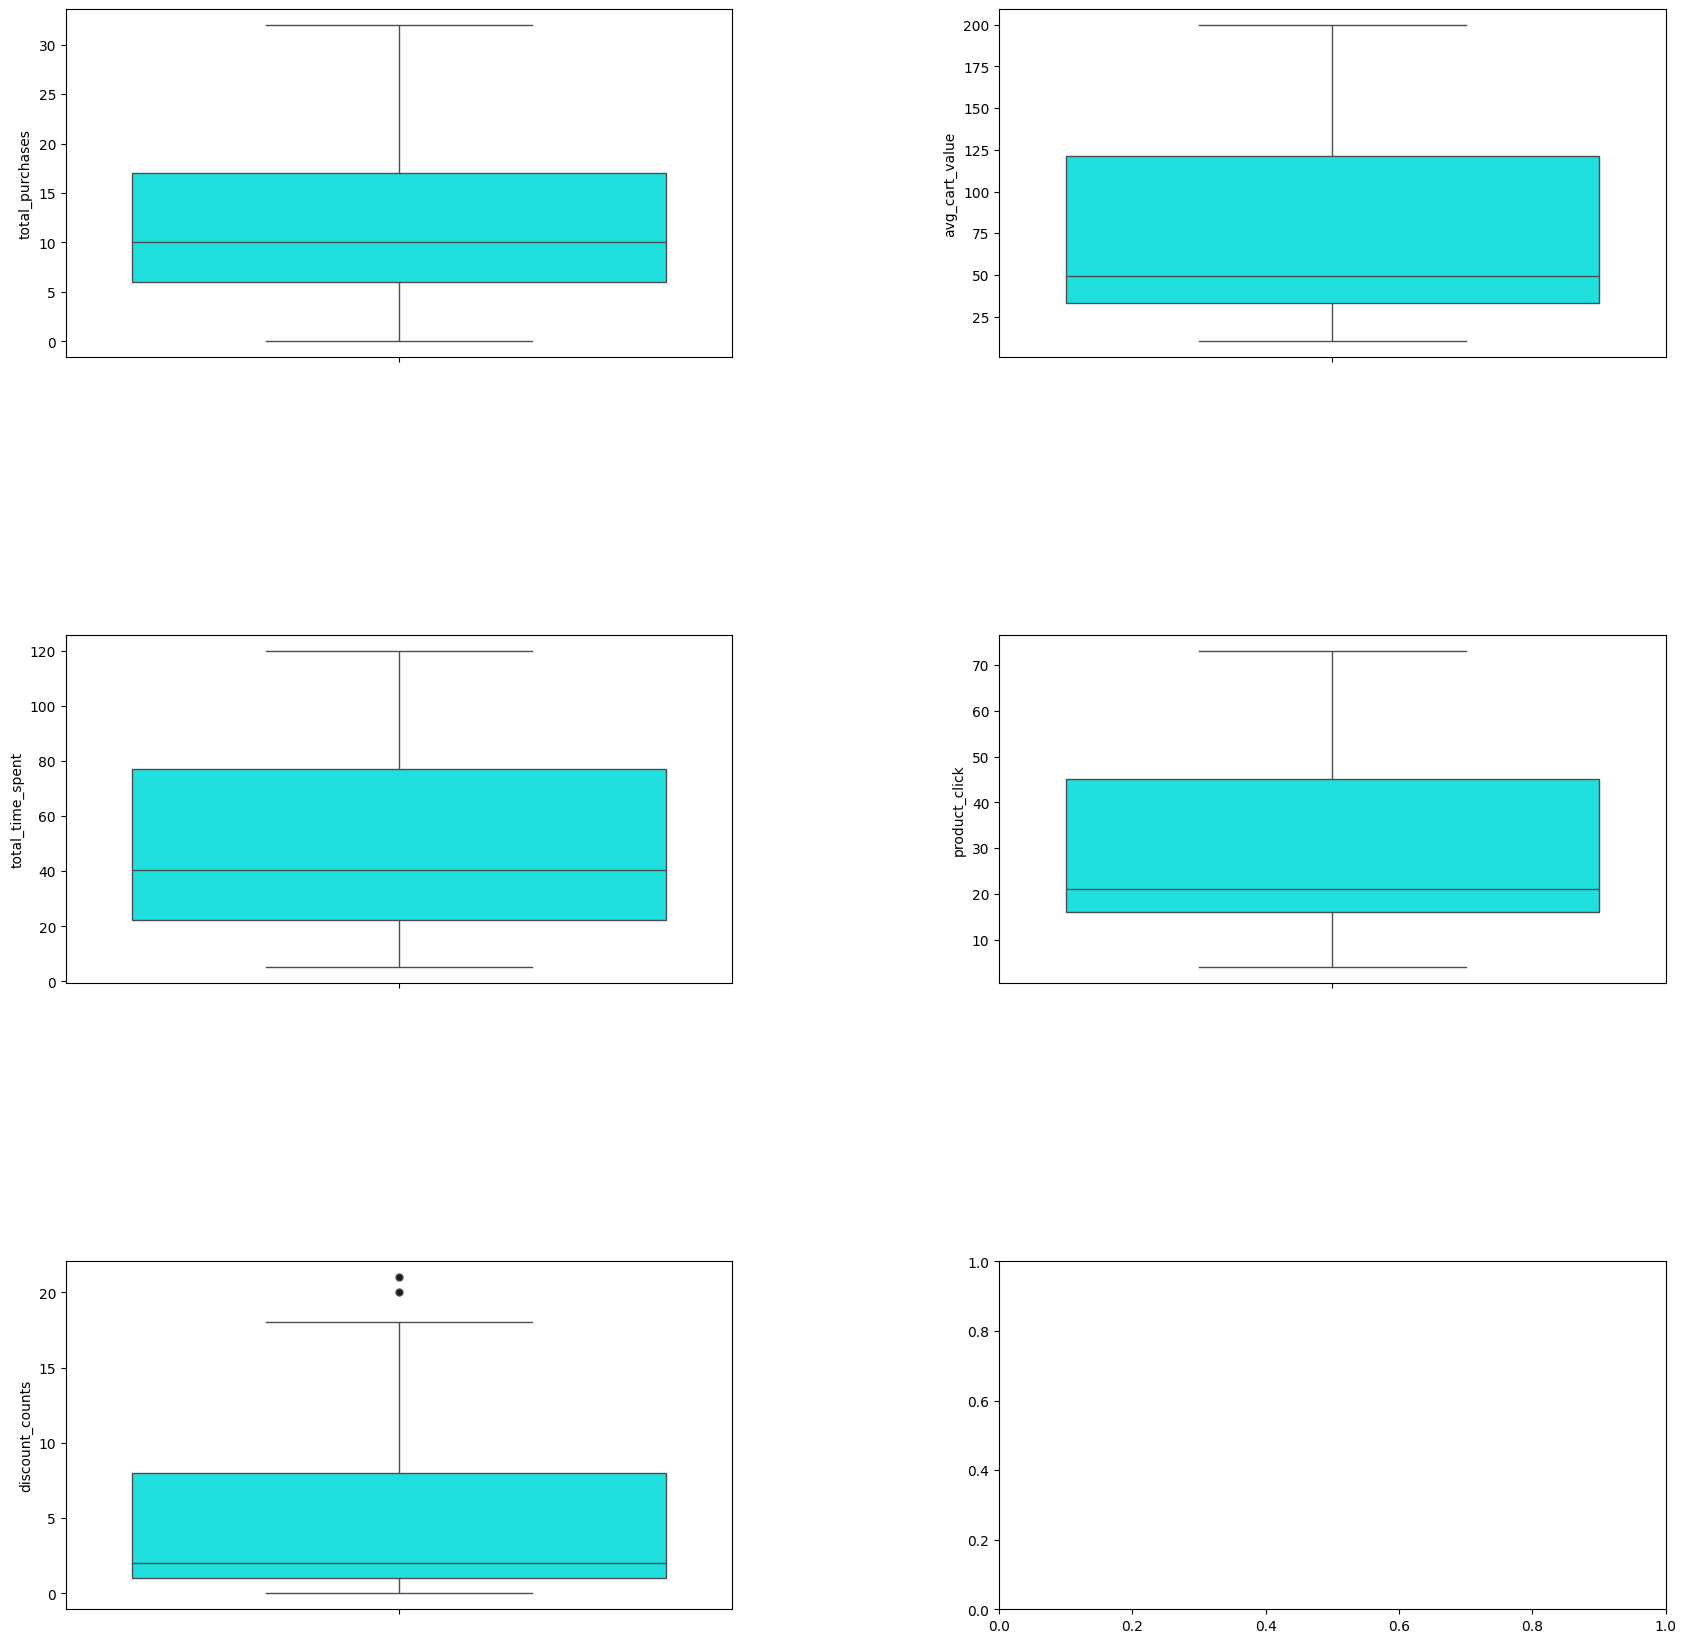

In [38]:
plt.subplots(nrows=3 , ncols=2 , figsize=(20,20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i in range (len(df.columns)-1):

    plt.subplot(3,2,i+1)
    sns.boxplot(df[df.columns[i]], color='aqua',flierprops = dict(markerfacecolor = '0.10', markersize = 5))


In [39]:
df.drop('customer_id', axis=1, inplace = True)

In [40]:
df

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,7.0,129.34,52.17,18.0,0.0
1,22.0,24.18,9.19,15.0,7.0
2,2.0,32.18,90.69,50.0,2.0
3,25.0,26.85,11.22,16.0,10.0
4,7.0,125.45,34.19,30.0,3.0
...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0
995,5.0,68.36,75.41,43.0,1.0
996,18.0,19.53,28.77,18.0,8.0
997,4.0,28.97,72.27,57.0,3.0


In [41]:
#finding outliers base on the Inter Quantile Range(IQR)

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

count_out = df[(df <  (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))].count()


df_count_out = pd.DataFrame(count_out, columns=['count_out'])
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [42]:
df.isna().sum()

,0
total_purchases,20
avg_cart_value,20
total_time_spent,0
product_click,20
discount_counts,0


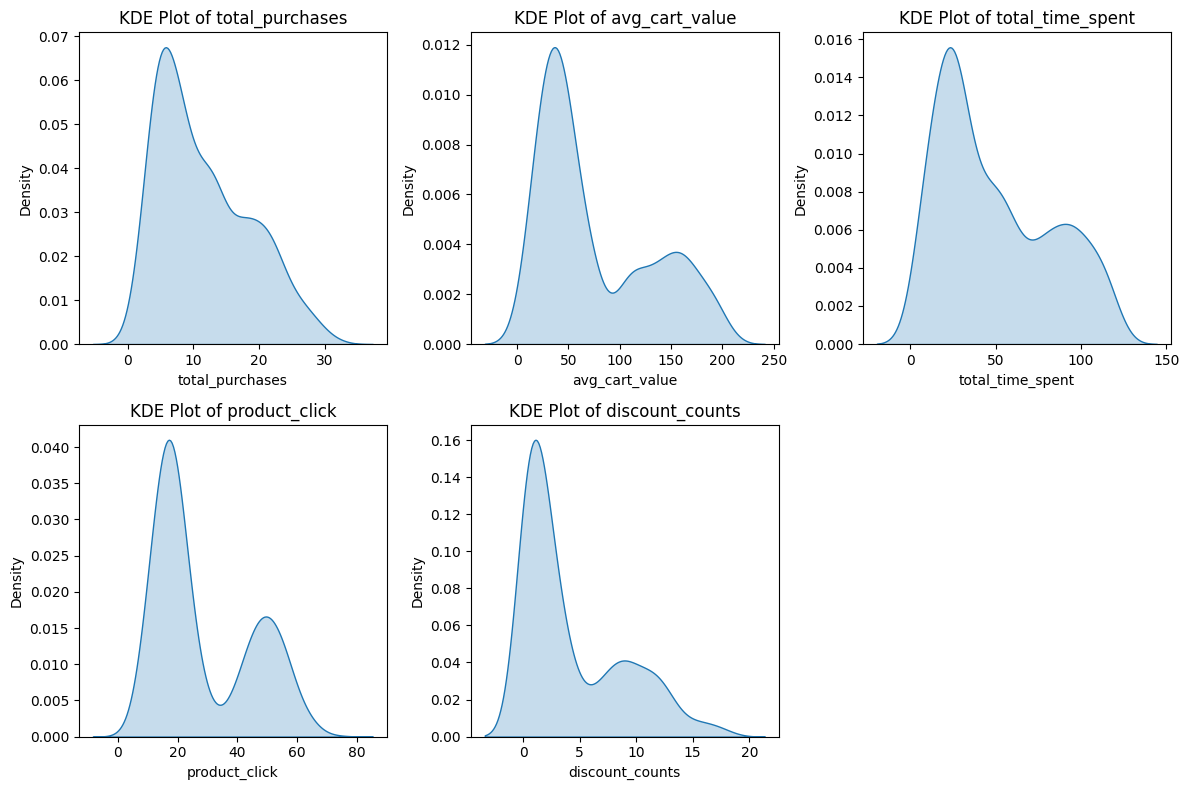

In [43]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, col in enumerate(df.columns):
    plt.subplot(2, 3, i + 1)  # Adjust subplot grid as needed
    sns.kdeplot(df[col], shade=True)
    plt.title(f'KDE Plot of {col}')

plt.tight_layout()
plt.show()


In [44]:
df['product_click'].fillna(0, inplace=True)
df['total_purchases'].fillna(df['total_purchases'].median(), inplace=True)
df['avg_cart_value'].fillna(df['avg_cart_value'].median(), inplace=True)


In [45]:
df.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,997.000000,997.000000,997.000000,997.000000,997.000000
mean,11.528586,75.030341,49.397743,27.710130,4.280843
std,6.951238,54.648694,32.744884,16.606092,4.478795
min,0.000000,10.260000,5.120000,0.000000,0.000000
25%,6.000000,33.380000,22.380000,16.000000,1.000000
50%,10.000000,49.510000,40.420000,20.000000,2.000000
75%,17.000000,118.530000,77.200000,45.000000,8.000000
max,32.000000,199.770000,119.820000,73.000000,18.000000


<Axes: >

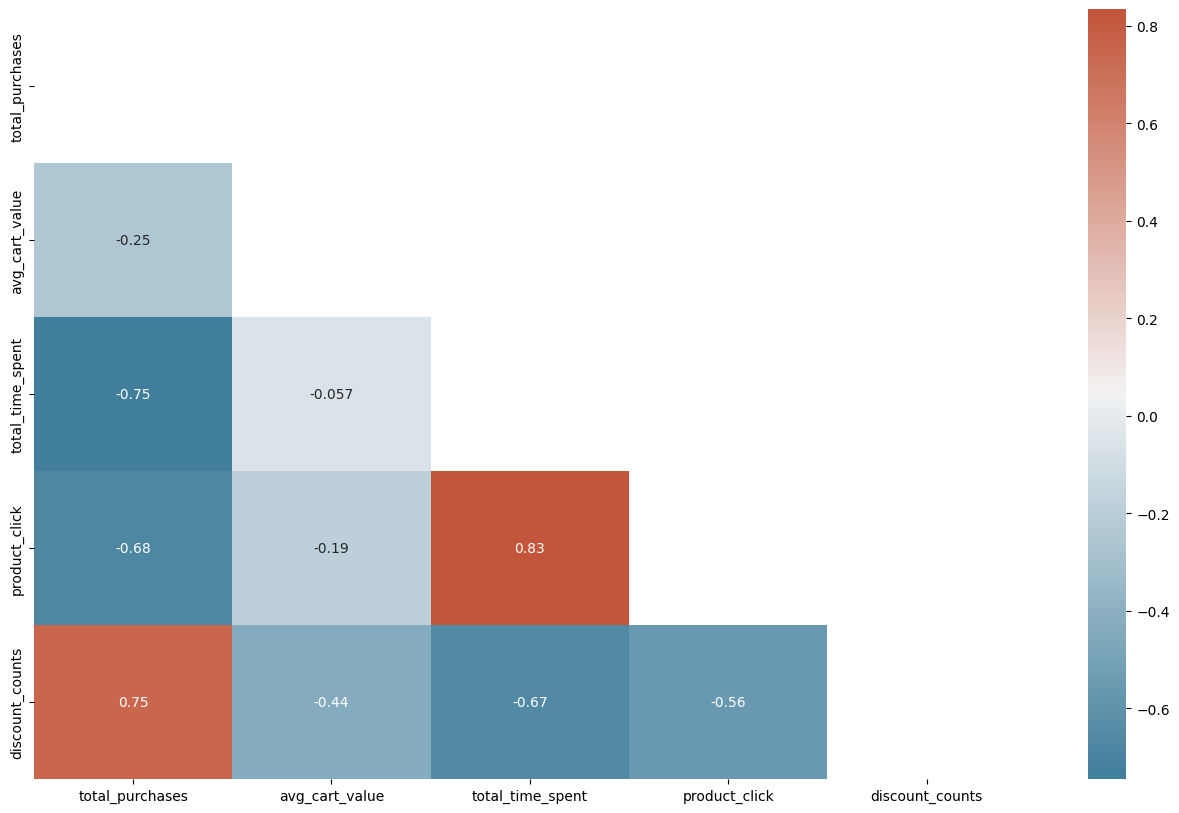

In [46]:
corr = df.corr()

f, ax = plt.subplots(figsize=(16, 10))

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

In [47]:
from sklearn.preprocessing import StandardScaler
df_model=df.copy()

scaler= StandardScaler()
df_Standardize=pd.DataFrame(scaler.fit_transform(df_model), columns = df_model.columns)
df_Standardize

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,-0.651806,0.994295,0.084705,-0.585027,-0.956282
1,1.507166,-0.930962,-1.228525,-0.765774,0.607423
2,-1.371463,-0.784499,1.261662,1.342944,-0.509509
3,1.938960,-0.882080,-1.166500,-0.705525,1.277582
4,-0.651806,0.923077,-0.464664,0.137963,-0.286123
...,...,...,...,...,...
992,-0.939669,-0.190225,0.711988,1.342944,-0.732896
993,-0.939669,-0.122120,0.794790,0.921201,-0.732896
994,0.931440,-1.016094,-0.630269,-0.585027,0.830809
995,-1.083600,-0.843267,0.698849,1.764688,-0.286123


In [48]:
df_Standardize.describe()

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
count,9.970000e+02,9.970000e+02,9.970000e+02,9.970000e+02,9.970000e+02
mean,1.140289e-16,-9.175765e-17,1.425362e-16,-5.701446e-17,7.839489e-17
std,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00,1.000502e+00
min,-1.659326e+00,-1.185808e+00,-1.352882e+00,-1.669510e+00,-9.562820e-01
25%,-7.957374e-01,-7.625296e-01,-8.255122e-01,-7.055247e-01,-7.328956e-01
50%,-2.200116e-01,-4.672234e-01,-2.743100e-01,-4.645283e-01,-5.095092e-01
75%,7.875086e-01,7.963867e-01,8.494826e-01,1.041699e+00,8.308092e-01
max,2.946481e+00,2.283719e+00,2.151713e+00,2.728673e+00,3.064673e+00


In [49]:
pip install colorama


In [52]:
!pip install kneed

In [53]:
from sklearn.cluster import KMeans

# Kmeans algorithm settings
kmeans_set = {"init":"random", "n_init":10, "max_iter":300, "random_state":42}
# Find inertia for k cluster
inertias = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    inertias.append(kmeans.inertia_)

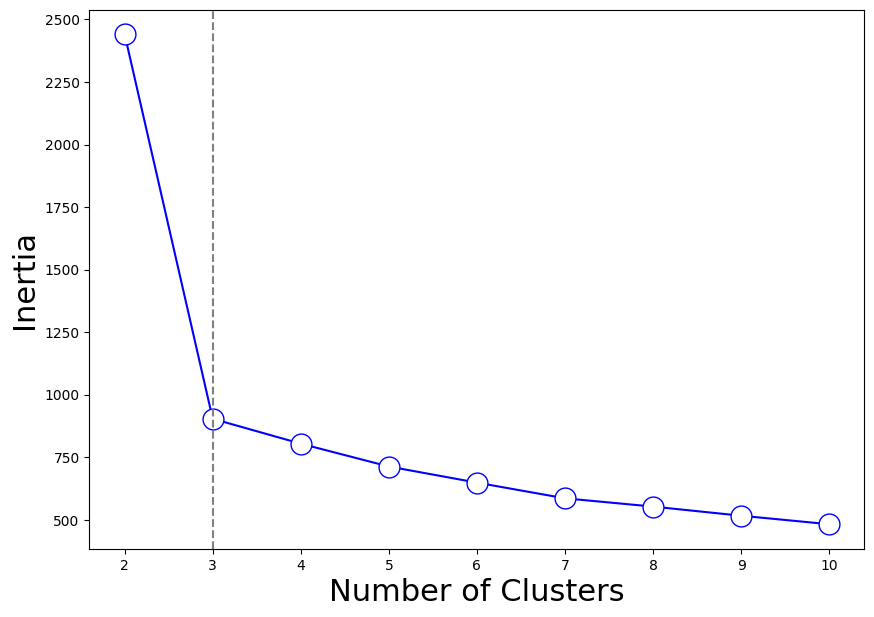

In [54]:
from kneed import KneeLocator, DataGenerator
kelbow = KneeLocator(range(2, 11), inertias, curve = 'convex', direction = 'decreasing')
kelbow.elbow

fig, ax = plt.subplots(facecolor="white",figsize = (10 ,7))

plt.plot(np.arange(2 , 11) , inertias  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
plt.xlabel('Number of Clusters',fontname="Gabriola",fontsize=22) , plt.ylabel('Inertia',fontname="Gabriola",fontsize=22)
plt. grid(False)

plt.annotate('Elbow: Optimal number of clusters  ', xy=(4, 98000), xytext=(5, 110000),fontsize=18,fontname="Gabriola",
             arrowprops=dict(facecolor='black', shrink=0.05),)

ax.set_facecolor("white")


plt.axvline(x=kelbow.elbow, color ='gray', label = 'axvline - full height', ls = '--')
plt.show()

In [55]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

silhouette = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    S_score = silhouette_score(df_Standardize, kmeans.labels_)
    silhouette.append(S_score)

calinski_harabasz = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    C_score = calinski_harabasz_score(df_Standardize, kmeans.labels_)
    calinski_harabasz.append(C_score)

davies_bouldin = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k, **kmeans_set)
    kmeans.fit(df_Standardize)
    D_score = davies_bouldin_score(df_Standardize, kmeans.labels_)
    davies_bouldin.append(D_score)

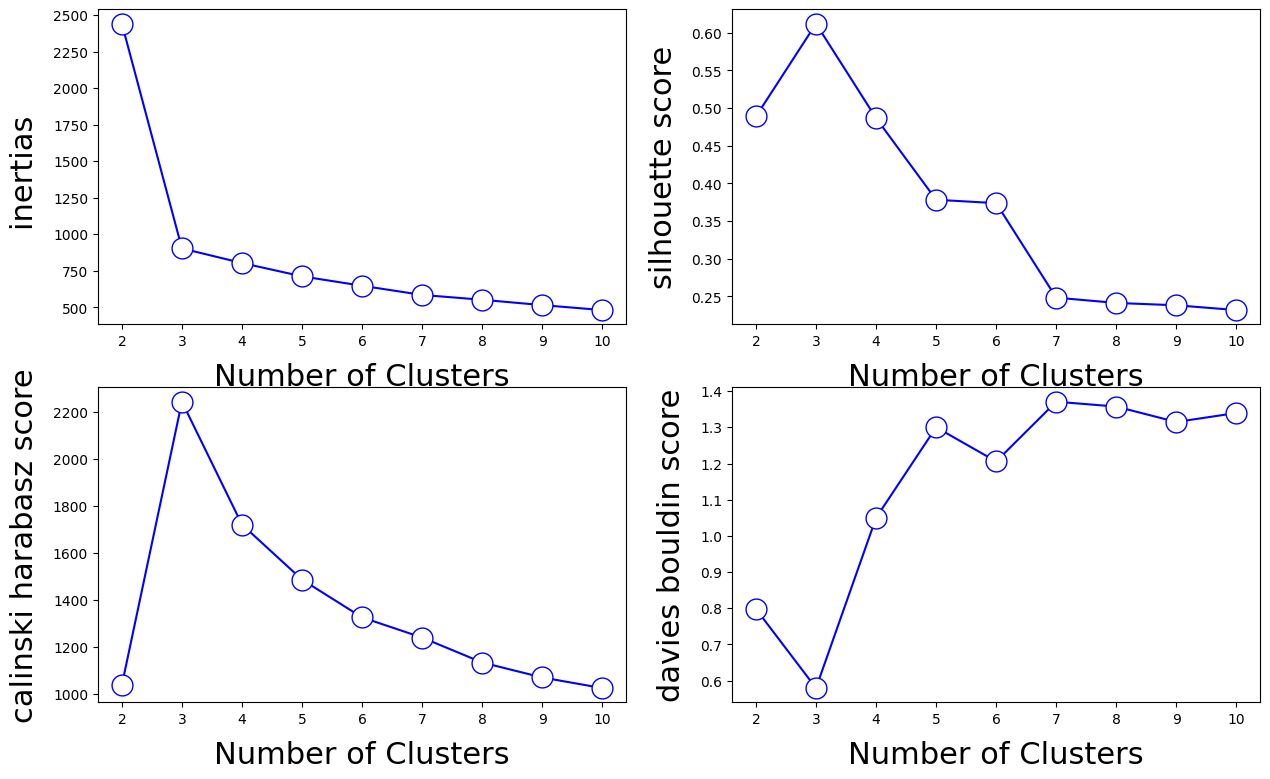

In [56]:
fig, ax = plt.subplots(2,2,facecolor="white",figsize = (15 ,9))

ax[0][0].plot(np.arange(2 , 11) , inertias  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
ax[0][1].plot(np.arange(2 , 11) , silhouette,  color='b', marker='.', markersize=30,markerfacecolor='white')
ax[1][0].plot(np.arange(2 , 11) , calinski_harabasz  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')
ax[1][1].plot(np.arange(2 , 11) , davies_bouldin  , alpha = 1,  color='b', marker='.', markersize=30, markerfacecolor='white')

ax[0][0].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)
ax[0][1].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][0].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][1].set_xlabel('Number of Clusters',fontname="Gabriola",fontsize=22,labelpad=10)

ax[0][0].set_ylabel('inertias ',fontname="Gabriola",fontsize=22,labelpad=10)
ax[0][1].set_ylabel('silhouette score',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][0].set_ylabel('calinski harabasz score',fontname="Gabriola",fontsize=22,labelpad=10)
ax[1][1].set_ylabel('davies bouldin score',fontname="Gabriola",fontsize=22,labelpad=10)




plt.show()

In [57]:
#assign optimal cluster to kmeans algoritm
Kmean_pred = KMeans(n_clusters=3, **kmeans_set )
Kmean_pred.fit(df_Standardize)
labels = Kmean_pred.labels_
#normalize centroids
centroids = pd.DataFrame(data=Kmean_pred.cluster_centers_ , columns = [df_Standardize.columns])
#real centroids
r_centers = scaler.inverse_transform(centroids)
real_centroids = pd.DataFrame(data = r_centers, columns = [df.columns])
real_centroids

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts
0,4.862805,49.029848,90.114726,49.716463,1.030488
1,19.522659,30.811178,17.466858,14.664653,9.906344
2,10.168639,143.564970,41.155000,19.130178,1.926036


In [25]:
df['cluster']=labels
df

,total_purchases,avg_cart_value,total_time_spent,product_click,discount_counts,cluster
0,7.0,129.34,52.17,18.0,0.0,2
1,22.0,24.18,9.19,15.0,7.0,1
2,2.0,32.18,90.69,50.0,2.0,0
3,25.0,26.85,11.22,16.0,10.0,1
4,7.0,125.45,34.19,30.0,3.0,2
...,...,...,...,...,...,...
994,5.0,64.64,72.70,50.0,1.0,0
995,5.0,68.36,75.41,43.0,1.0,0
996,18.0,19.53,28.77,18.0,8.0,1
997,4.0,28.97,72.27,57.0,3.0,0


In [26]:
df_count = df.groupby(by=["cluster"]).size().reset_index(name="counts")
df_count


,cluster,counts
0,0,330
1,1,330
2,2,337


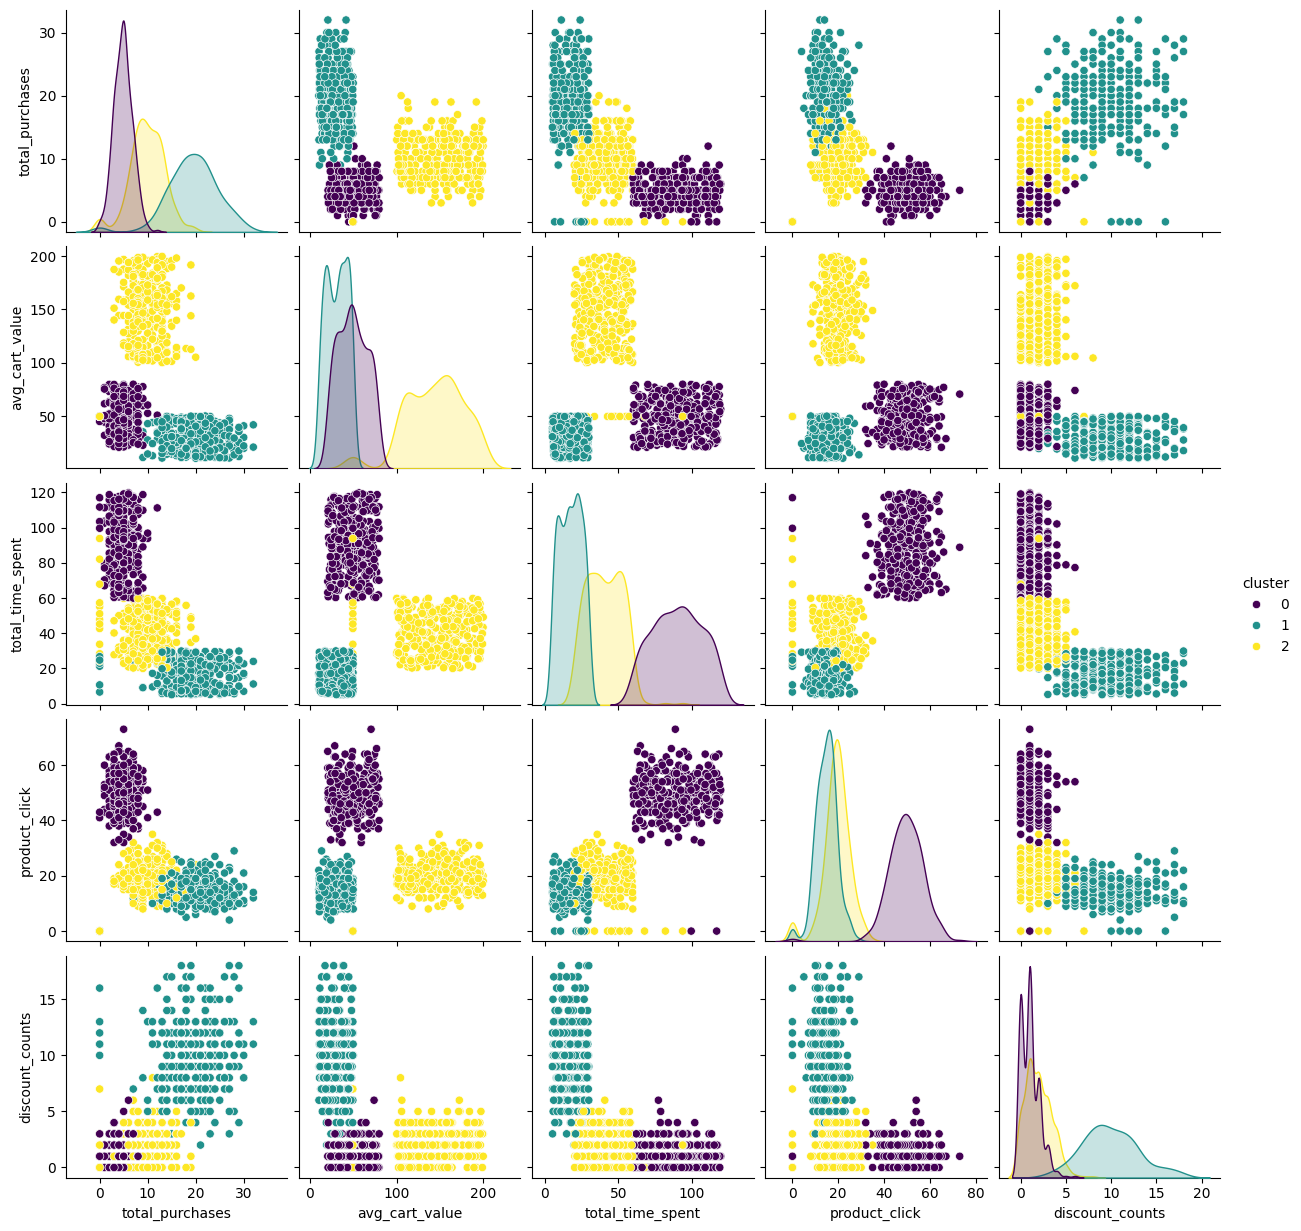

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df, hue='cluster', diag_kind='kde', palette='viridis')
plt.show()


In [28]:
from sklearn.metrics import silhouette_score

score = silhouette_score(df.drop(['cluster'], axis=1), df['cluster'])
print(f"Silhouette Score: {score}")


Silhouette Score: 0.6547420080979642


In [29]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
Principal_2 = pca.fit_transform(df_Standardize)

#2D
pca2 = pd.DataFrame(data = Principal_2, columns = ['pca1', 'pca2'])
pca2.head()
df_pca2 = pd.concat([pca2, pd.DataFrame({'cluster':labels})], axis=1)
df_pca2.head()


,pca1,pca2,cluster
0,0.637250,1.395221,2
1,-2.146722,-0.576436,1
2,2.124925,-1.133724,0
3,-2.620289,-0.827110,1
4,0.362600,0.985222,2


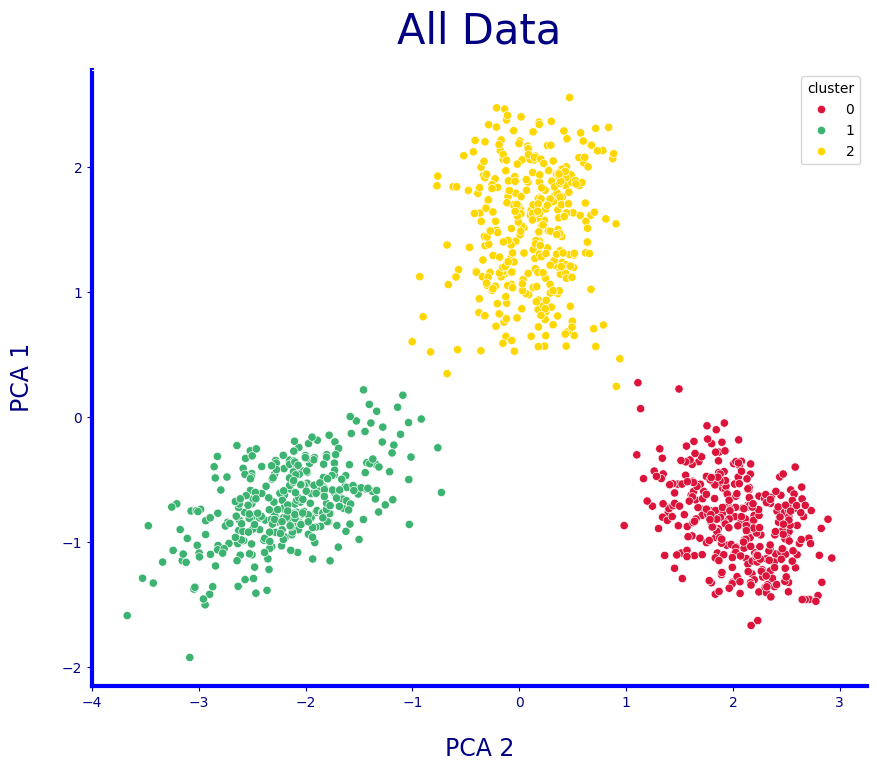

In [30]:
plt.figure(figsize = (10,8))
palette1=["crimson","MediumSeaGreen","gold"]
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=df_pca2, palette=palette1)
plt.title('All Data', fontsize = 30, color='navy', y=1.03)
plt.xlabel("PCA 2", labelpad=20 , size=17)
plt.ylabel("PCA 1", labelpad=20 , size=17)

ax.spines['bottom'].set_color('blue')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_color('blue')
ax.xaxis.label.set_color('navy')
ax.yaxis.label.set_color('navy')
ax.tick_params(colors="navy", which='both')  # 'both' refers to minor and major axes
plt.show();